In [1]:
import matplotlib.pyplot as plt

from sentinel2_wrappers.sentinelhub.request_scripts import TRUECOLOR, TRUECOLOR_CLM
from sentinel2_wrappers.sentinelhub.make_requests import make_box_request

/Users/Ivan/Documents/python/sat-data/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


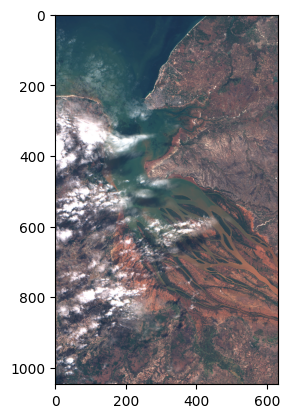

In [2]:
request = make_box_request(TRUECOLOR, area_coordinates = (46.16, -16.15, 46.51, -15.58),
    time_interval =("2020-06-12", "2020-06-13"),
    resolution_m =  60,
)
images = request.get_data()
img = images[0]
plt.imshow(img*3.5/255)

In [3]:
from sentinelhub import SentinelHubRequest
SentinelHubRequest.input_data

<function sentinelhub.api.base_request.SentinelHubBaseApiRequest.input_data(data_collection: 'DataCollection', *, identifier: 'str | None' = None, time_interval: 'RawTimeIntervalType | None' = None, maxcc: 'float | None' = None, mosaicking_order: 'MosaickingOrder | None' = None, upsampling: 'ResamplingType | None' = None, downsampling: 'ResamplingType | None' = None, other_args: 'dict[str, Any] | None' = None) -> 'InputDataDict'>

In [4]:
# a very simple approx
km2deg = 1.0 / 111
x, y = (113.887, -25.43)  # Center point of a query, Madagascar
dx = 80 #km
dy = 50
rx = dx * km2deg
ry = dy*km2deg
bbox = (x - rx, y - ry, x + rx, y + ry)
bbox_km = (x-dx, y-dy, x+dx, y+dy)

In [6]:
request = make_box_request(TRUECOLOR, area_coordinates = bbox,
    time_interval =("2020-06-04", "2020-06-13"),
    resolution_m =  60,
    max_could_frac = 0.2,
)
images = request.get_data()
img = images[0]
plt.imshow(img*3.5/255)

TypeError: make_box_request() got an unexpected keyword argument 'max_cloud_frac'

In [ ]:
len(images)

1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


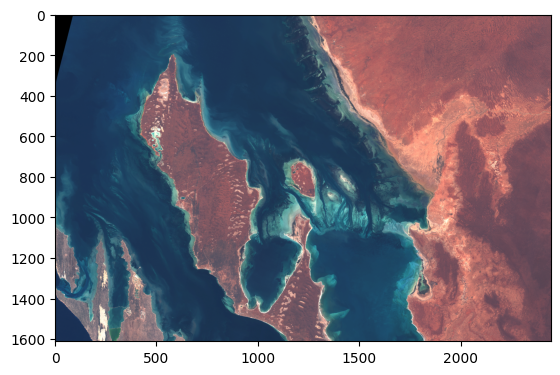

In [ ]:
composite = images[0]
for i, im in enumerate(images[1:]):
    composite = np.where(composite !=0, composite, im)
    print(i)
    print(np.argwhere(composite == 0))
    
plt.imshow(composite*3.5/255)